# ${\color{salmon} {Quiz 1: \text {Gradient Descent}}}$


## 1- Write down how to synthesize the data.

In [ ]:
from random import Random

def generate_num(N=1000):
  SEED = 5
  random_num = Random(x=SEED)
  return(
      [random_num.uniform(a=1,b=2) for _ in range(N)],
      [random_num.uniform(a=1,b=2) for _ in range(N)],
      [random_num.uniform(a=1,b=2) for _ in range(N)]
  )
data_x, data_y, data_z = generate_num()

## 2- Modify loss function to $ 3 $ Coordinates "Dimensions"

$$\;\mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2} + (z_{i} - z_{p})^{2} ]^{\frac{1}{2}}$$

In [ ]:
# code wasn't required
from math import sqrt as root

def loss(x_p, y_p, z_p):
  return (1/len(data_x))* sum([root((x_i-x_p)**2+(y_i-y_p)**2 +(z_i-z_p)**2) for x_i , y_i , z_i in zip(data_x, data_y, data_z)])

## 3- Write down optimization loop

In [ ]:
x_p , y_p , z_p = 2, 2, 2
EPOCHS =1000
DELTA = 0.01
H = 0.001
losses = []

for _ in range(EPOCHS):
  losses.append(loss(x_p , y_p , z_p))
  dl_dx = ( loss(x_p + H , y_p , z_p) - loss(x_p , y_p , z_p)) /H
  dl_dy = ( loss(x_p  , y_p + H, z_p) - loss(x_p , y_p , z_p) ) /H
  dl_dz = ( loss(x_p  , y_p , z_p + H) - loss(x_p , y_p , z_p) ) /H
  x_p -= DELTA *dl_dx
  y_p -= DELTA *dl_dy
  z_p -= DELTA *dl_dz

# ${\color{salmon} {Quiz 2: \text {Pytorch & Supervised learning}}}$


## 1. Make adjustments to the existing code are necessary to effectively address the new problem.

\
\begin{align*}
\text{Calculate weighted sum:} \\
a_0 &= w_{(0,0)} \cdot x_0 + w_{(0,1)} \cdot x_1 + b_0 \\
a_1 &= w_{(1,0)} \cdot x_0 + w_{(1,1)} \cdot x_1 + b_1 \\
a_2 &= w_{(1,0)} \cdot x_0 + w_{(1,1)} \cdot x_1 + b_2
\\
\text {weights is 3x2 matrix} \\
\text {biases is 1x3 matrix}
\end{align*}




In [ ]:
y_train = torch.nn.functional.one_hot(y_train, num_classes = 2) # num_classes = 3 
y_valid = torch.nn.functional.one_hot(y_valid, num_classes = 2) # num_classes = 3

w = torch.randn(size = (2, 2)) # size = (3, 2)
b = torch.randn(size = (1, 2)) # size = (1, 3)

## 2. Use root mean square error as the loss function instead of cross entropy

In [ ]:
import torch 
return torch.sqrt(torch.mean(( y - y_hat )**2 ))

## 3.  Use stochastic gradient descent and choose your batch size. 

In [ ]:
EPOCHS = 20
DELTA = 0.01
sgd_train_loss, sgd_valid_loss = [], []
BATCH_SIZE = 100
NUM_OF_BATCHES = floor(800 / BATCH_SIZE)
for _ in range(EPOCHS):

    for i in range(NUM_OF_BATCHES):
        batch_x_train = x_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE, :]
        batch_y_train = y_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
        sgd_curr_train_loss = loss_torch(batch_x_train, batch_y_train)
        sgd_curr_train_loss.backward()
        sgd_train_loss.append(sgd_curr_train_loss.data)

        with tc.no_grad():
            w -= DELTA * w.grad.data
            b -= DELTA * b.grad.data
            w.grad.zero_()
            b.grad.zero_()   
            sgd_curr_valid_loss = loss_torch(x_valid, y_valid)
            sgd_valid_loss.append(sgd_curr_test_loss)  

# ${\color{salmon} {Quiz 3: \text {Auto-Grad Engine}}}$


## Overload the " $\mathbb{log}$ " function

In [ ]:
import numpy as np

def __log__(self):
     if self.val == 0:
      raise ValueError("can't get log of zero")
     out = comp_node(val= np.log(self.val), children=[self], op="log")
     def __backward_prop():
      #  d(log(u))/du = 1 / u 
         self.grad += out.grad / self.val
     out.backward_prop = __backward_prop
     return out


# ${\color{salmon} {Quiz 4: \text {Graph Traversal}}}$


## Given a Graph traverse it, each Course then its pre-requists [ A, B, C, D, E ]

In [4]:
from graphviz import Digraph, Graph
def draw_graph(vertices, edges, directed):

    # Create a new Digraph
    if directed:
      dot = Digraph(format = 'svg')
    else:
      dot = Graph(format = 'svg')

    # Set the direction of the edges to Top-to-Bottom
    dot.attr(rankdir='TB')

    # Add nodes to the graph
    for node in vertices:
        dot.node(name= str(node), label= f"{node}")
    if not directed:
      #  keep track of edges that have already been added to the graph
      already_drawn = set()

    # Add edges to the graph
    for node, edge_list in edges.items():
        for edge in edge_list:
          if directed:
            dot.edge(str(node), str(edge))
          else:
            #  ensure that the order of nodes in the edge does not affect the comparison of edges
            sorted_edges = tuple(sorted([node, edge]))
            #  If the edge has not been added, it adds the edge to the graph using the dot.edge() method 
            # and adds the tuple to the already_drawn set
            if sorted_edges not in already_drawn:
              already_drawn.add(sorted_edges) 
              dot.edge(str(node), str(edge))

    # Render the graph to an SVG file and open it in the default viewer (optional)
    dot.render('graph', format='svg', view=True)
    return dot

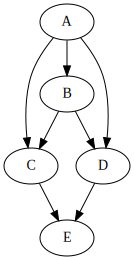

In [5]:
graph_vert = ["A" ,"B" , "C" , "D", "E"]
graph_edges = {
    "A" : ["B" , "C" , "D"],
    "B" : ["C" , "D"],
    "C" : ["E"],
    "D" : ["E"],
    "E" : []
}

draw_graph(graph_vert , graph_edges, True )

In [7]:
def topo_lst(graph, start):
  visited = set()
  stack = []

  def visit(node):
    if node in visited:
      return

    else:
      visited.add(node)
      for neighbour in graph[node]:
        visit(neighbour)
      stack.append(node)

  for node in graph.keys():
    if node not in visited:
      visit(node)
  return stack[::-1]

topo_lst(graph_edges , "A")

['A', 'B', 'D', 'C', 'E']

In [8]:
def DFS(graph, start):
  visited = set()
  STACK = []
  def visit(node):
    if node in visited:
      return
    else:
      visited.add(node)
      STACK.append(node)
      for neighbour in graph[node]:
        visit(neighbour)

  for node in graph.keys():
    if node not in visited:
      visit(node)
  return STACK

DFS(graph_edges , "A")

['A', 'B', 'C', 'E', 'D']

In [ ]:
# not the best solution
from collections import deque

def bft_lst(graph , start):
  queue = deque([start])
  visited = set()
  stack = []
  while queue:
    node = queue.popleft()
    if node not in visited:
      visited.add(node)
      stack.append(node)
      for neighbours in graph[node]:
        queue.append(neighbours)
  return stack

bft_lst(graph_edges , "A")

['A', 'B', 'C', 'D', 'E']

# ${\color{salmon} {\text {Remake Quiz}: }}$


## It is required to make the calculations to find the parameters $m$ and $c$ for the straight line $y = mx + c$, with least mean squared error to a set of arbitrary uniformly distributed points in $R^2 $ space.


![Visualization](https://labwrite.ncsu.edu/res/gh/2d-scatter-linreg.gif)

## 1.  Write down how to synthesize the data.


In [ ]:
def generate_num(N=5000):
  SEED = 5
  random_num = Random(x=SEED)
  return(
      [random_num.uniform(a=1,b=2)
      for _ in range(N)],
      [random_num.uniform(a=1,b=2)
      for _ in range(N)]
  )
data_x, data_y = generate_num()

## 2. Write down equations for mathematical relation (loss function and gradient descent).

![solution](https://i.ibb.co/zZ6TPTj/Screenshot-2023-06-06-124406.png)

In [ ]:
from numpy.core.fromnumeric import mean

def loss_m (m , c, data_x , data_y):
  return mean( [( y_i - (m * x_i + c) ** 2 ) for x_i , y_i in zip(data_x , data_y)]) 

In [ ]:
def calc_grad(m , c, data_x , data_y):
  dl_dm = -2 * mean([(( y_i - (m * x_i + c) )* x_i ) for x_i , y_i in zip(data_x , data_y)])
  dl_dc = -2 * mean([ ( y_i - (m * x_i + c) ) for x_i , y_i in zip(data_x , data_y)])
  return dl_dm, dl_dc

In [ ]:
from math import ceil
# GD
m , c  = 2.0 , 2.0
EPOCHS = 1000
DELTA = 0.01
losses = []

for i in range(EPOCHS):
  losses.append(loss_m(m , c, data_x, data_y))
    # calc local gradient
  dl_dm, dl_dc = calc_grad(m , c, data_x , data_y)
    # update parameters
  m -= DELTA * dl_dm
  c -= DELTA * dl_dc

print(f"m $ c after GD optimization{m , c}")

# # SGD 
EPOCHS = 20
DELTA = 0.001
BATCH_SIZE = 700
N = len(data_x)
NUM_OF_BATCHES = ceil(N / BATCH_SIZE)
SEED = 5
sgd_loss = []
sampler = Random(SEED)
indices = [i for i in range(N)]
for _ in range(EPOCHS):
    sampler.shuffle(indices)
    for i in range(NUM_OF_BATCHES):
      batch_indices = indices[BATCH_SIZE * i :BATCH_SIZE * (i+1)]
      batch_x = [data_x[i] for i in batch_indices ]
      batch_y = [data_y[i] for i in batch_indices ]
      sgd_loss.append(loss_m(m , c, batch_x, batch_y)) 
      dl_dm, dl_dc = calc_grad(m , c, data_x , data_y)
      m -= DELTA * dl_dm
      c -= DELTA * dl_dc



print(f"m $ c after SGD optimization{m , c}")
# m $ c after SGD optimization without shuffle (0.2243900434050485, 1.1581757704850137)
# m $ c after SGD optimization with shuffle (0.22417437912349775, 1.1585076295169805)